In [ ]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/gan.csv'
df = pd.read_csv(path)
print('\nNumber of rows and columns in the data set: ',df.shape)
test = pd.read_csv('/content/drive/My Drive/gantest.csv')


Number of rows and columns in the data set:  (4500, 514)


In [ ]:
df

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,0.029433,-0.072952,-0.063137,-0.027426,0.009050,-0.032587,0.005451,-0.101231,-0.134099,0.067560,-0.002083,0.078040,-0.024938,-0.029395,0.027814,-0.050992,0.121394,0.106751,0.001935,0.047460,-0.018330,-0.058942,0.055872,-0.083219,-0.023057,0.045138,0.080400,-0.032720,0.037929,0.016872,0.175460,0.086574,-0.088680,-0.054209,-0.019898,0.085469,-0.146745,-0.000734,-0.163095,...,0.013406,0.087366,-0.048248,-0.077322,-0.049410,0.018462,-0.036421,0.053984,-0.128585,-0.037571,-0.038897,0.082227,-0.075013,-0.074086,0.044075,0.009034,-0.207801,0.119168,-0.002119,0.023028,-0.082201,-0.060344,-0.088316,0.023726,0.088277,0.025180,-0.027934,0.067269,-0.020810,-0.115068,-0.091886,0.057622,-0.063235,-0.081697,-0.032337,-0.084307,-0.032826,0.096038,-0.064696,0.634667
std,1299.182435,0.769812,0.740963,0.746607,0.744712,0.775853,0.770992,0.761690,0.748796,0.746005,0.747827,0.714939,0.706872,0.663820,0.812123,0.755075,0.751805,0.772157,0.723660,0.758057,0.767998,0.712469,0.770689,0.754416,0.761771,0.773681,0.764593,0.735932,0.751691,0.776739,0.743376,0.767899,0.815652,0.763232,0.731656,0.746060,0.718874,0.770070,0.780750,0.745571,...,0.695161,0.696326,0.770055,0.681999,0.755388,0.738660,0.758322,0.713244,0.762161,0.752204,0.745001,0.753694,0.729876,0.771973,0.752416,0.766827,0.738646,0.724609,0.774068,0.750480,0.746982,0.809670,0.735013,0.692339,0.820121,0.757211,0.757624,0.748709,0.755673,0.735968,0.735644,0.739561,0.731691,0.761166,0.738119,0.743303,0.756891,0.737970,0.830538,0.481577
min,1.000000,-2.895330,-2.381940,-2.599930,-2.748930,-2.291530,-4.020940,-2.736720,-2.872970,-2.397950,-2.768610,-3.220590,-2.342850,-3.063600,-2.655160,-2.394360,-2.711950,-3.070490,-2.352870,-2.819900,-2.521800,-2.366830,-3.290500,-2.332010,-2.569310,-2.460720,-2.406860,-2.527720,-2.841720,-2.551610,-2.209130,-3.108830,-2.674820,-3.121610,-3.072380,-2.545570,-2.077640,-3.127940,-2.741990,-2.663210,...,-2.409010,-2.726200,-2.931060,-2.221200,-2.210510,-2.548280,-2.654120,-2.666030,-2.746630,-2.810960,-3.180610,-2.232400,-2.435070,-3.109640,-2.594380,-2.391540,-2.737760,-2.293100,-2.493990,-2.443920,-2.523910,-3.252070,-2.860860,-2.447960,-2.610140,-2.591580,-2.418330,-2.469600,-2.350780,-2.586140,-2.788230,-2.624400,-2.806240,-2.907480,-3.136690,-2.490630,-2.510730,-2.626380,-2.906970,0.000000
25%,1125.750000,-0.489807,-0.568788,-0.575425,-0.548003,-0.541330,-0.550515,-0.516868,-0.582322,-0.658523,-0.455873,-0.501383,-0.369287,-0.458875,-0.574332,-0.507650,-0.573000,-0.408225,-0.340958,-0.458318,-0.479683,-0.532473,-0.578270,-0.474053,-0.608855,-0.556867,-0.519232,-0.421403,-0.543945,-0.482272,-0.518310,-0.352270,-0.421890,-0.608073,-0.528593,-0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 514 entries, id to glasses
dtypes: float64(512), int64(2)
memory usage: 17.6 MB


In [ ]:
#Check for missing value
print(df.isnull())
print(df.isnull().sum())

         id     v1     v2     v3     v4  ...   v509   v510   v511   v512  glasses
0     False  False  False  False  False  ...  False  False  False  False    False
1     False  False  False  False  False  ...  False  False  False  False    False
2     False  False  False  False  False  ...  False  False  False  False    False
3     False  False  False  False  False  ...  False  False  False  False    False
4     False  False  False  False  False  ...  False  False  False  False    False
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...      ...
4495  False  False  False  False  False  ...  False  False  False  False    False
4496  False  False  False  False  False  ...  False  False  False  False    False
4497  False  False  False  False  False  ...  False  False  False  False    False
4498  False  False  False  False  False  ...  False  False  False  False    False
4499  False  False  False  False  False  ...  False  False  False  False    False

[4500 rows x 51

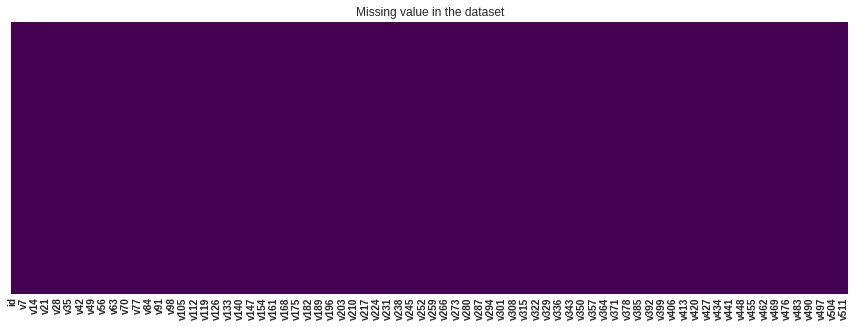

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
#Check for datatypes of train dataset 
df.dtypes

id           int64
v1         float64
v2         float64
v3         float64
v4         float64
            ...   
v509       float64
v510       float64
v511       float64
v512       float64
glasses      int64
Length: 514, dtype: object

In [ ]:
#Check for presence of NULL values in train dataset 
sumnull=0
for i in df.isna().sum():
  sumnull = sumnull + i
print(df.isna().sum())
print("total sum of null values in all columns : ",sumnull)

id         0
v1         0
v2         0
v3         0
v4         0
          ..
v509       0
v510       0
v511       0
v512       0
glasses    0
Length: 514, dtype: int64
total sum of null values in all columns :  0


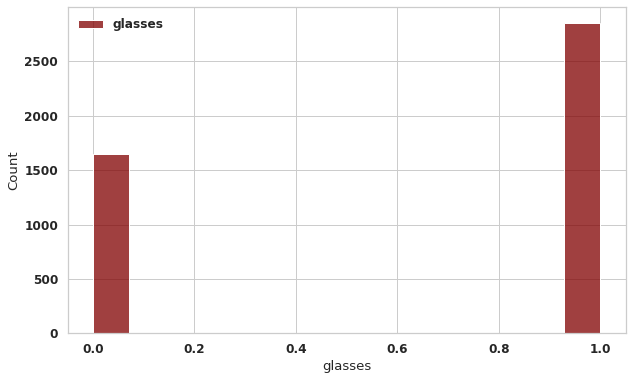

In [ ]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 6]})
sns.histplot(data = df, x="glasses", color="maroon", label="glasses")
plt.legend() 
plt.show()

In [ ]:
X=df.drop(['id','glasses'],axis=1)
Y=df['glasses']

In [ ]:
accuracies=[]

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
deep_tree = RandomForestClassifier(max_depth=12, random_state=42)
shallow_tree = RandomForestClassifier(max_depth=2, random_state=42)


Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y, test_size=0.2, random_state=42)
deep_tree.fit(Xtrain,Ytrain)
shallow_tree.fit(Xtrain,Ytrain)
pred1 = deep_tree.predict(Xtest)
pred2 = shallow_tree.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of deeper tree (has more computation cost)")
print(accuracy_score(Ytest,pred1))
accuracies.append(accuracy_score(Ytest,pred1))
print("\nAccuracy of shallow tree (has lesser computation cost)")
print(accuracy_score(Ytest,pred2))

Accuracy of deeper tree (has more computation cost)
0.9333333333333333

Accuracy of shallow tree (has lesser computation cost)
0.6433333333333333


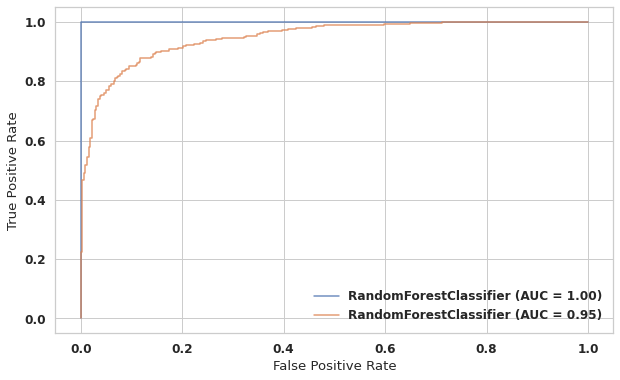

In [ ]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp1 = plot_roc_curve(deep_tree, Xtest, Ytest, ax=ax, alpha=0.8)
rfc_disp2 = plot_roc_curve(shallow_tree, Xtest, Ytest, ax=ax, alpha=0.8)
plt.show()

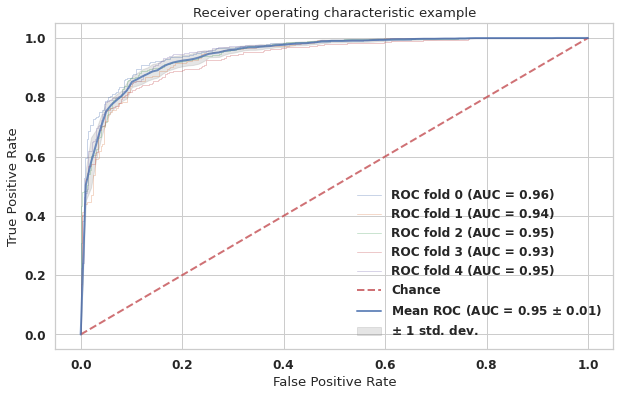

In [ ]:
# perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    shallow_tree.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(shallow_tree.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(shallow_tree, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

List of all accuracies obtained: [63.44444444444445, 63.44444444444445, 63.44444444444445, 63.44444444444445, 63.55555555555556]

Maximum Accuracy that can be obtained from this model is: 63.55555555555556 %

Minimum Accuracy that can be obtained from this model is: 63.44444444444445 %

Overall Accuracy: 63.46666666666667 %

Standard Deviation is: 0.049690399499993564


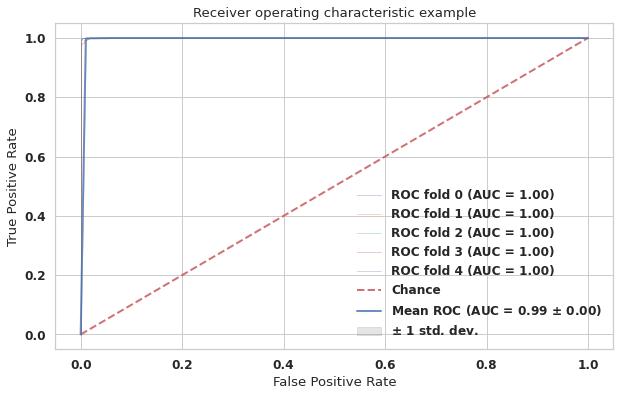

List of all accuracies obtained: [94.44444444444444, 94.44444444444444, 92.0, 95.11111111111111, 93.33333333333333]

Maximum Accuracy that can be obtained from this model is: 95.11111111111111 %

Minimum Accuracy that can be obtained from this model is: 92.0 %

Overall Accuracy: 93.86666666666666 %

Standard Deviation is: 1.223231906179813


In [ ]:
# perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    deep_tree.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(deep_tree.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(deep_tree, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

[[263  60]
 [  0 577]]


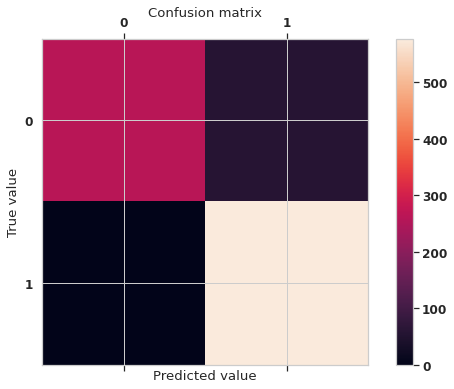

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, pred1)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

[[  2 321]
 [  0 577]]


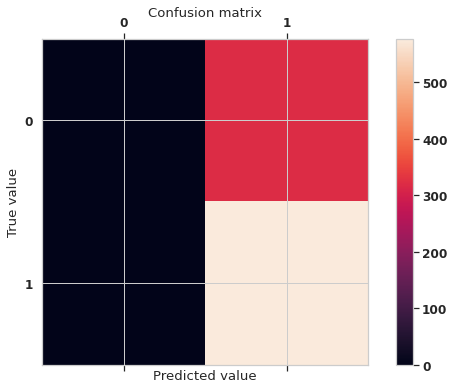

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, pred2)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, pred1, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       1.00      0.81      0.90       323
 Non-glasses       0.91      1.00      0.95       577

    accuracy                           0.93       900
   macro avg       0.95      0.91      0.92       900
weighted avg       0.94      0.93      0.93       900



In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, pred2, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       1.00      0.01      0.01       323
 Non-glasses       0.64      1.00      0.78       577

    accuracy                           0.64       900
   macro avg       0.82      0.50      0.40       900
weighted avg       0.77      0.64      0.51       900



# PCA with Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
pd.DataFrame(X_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,0.452807,-1.181200,0.102604,0.277126,0.475529,0.866897,0.175917,-0.206807,-0.347639,1.366656,-1.900229,-1.971340,0.581740,-0.737871,-2.226136,2.025566,-1.306621,-0.506055,-0.456579,-0.568555,0.565112,-0.579530,-0.199358,0.510577,-1.360715,-0.921348,1.398082,1.669835,-0.209513,0.652647,-1.061169,0.647990,1.646012,0.578777,-0.568492,0.523726,-0.890051,-0.959165,-0.327471,0.721361,...,-0.349825,0.758634,-1.159522,1.507680,-0.054211,1.198974,0.208330,-1.360693,-0.011630,-0.002263,2.809470,0.695696,0.808764,1.981931,0.685186,-1.335321,0.070632,0.412207,-0.644086,0.130506,-1.198152,1.215881,0.727234,1.265976,0.207990,0.611871,-0.336509,-0.016153,0.117911,-0.522612,1.081102,0.077419,1.713110,-1.206196,0.134344,-1.635072,0.698820,1.478813,2.160533,0.819784
1,0.060616,-0.033458,0.615916,-0.487268,0.125050,0.726841,0.086133,0.585579,1.117099,-0.128360,-0.786486,0.484667,-0.678562,2.006872,-0.064734,-2.994377,-0.566702,-0.258785,1.119401,-0.199502,-0.439984,-1.637778,-0.368951,-0.574437,0.547026,-0.599769,-0.315499,1.402687,-0.729115,0.874901,0.485770,0.118514,0.493116,-1.020581,-1.113308,0.508492,1.337580,-1.451349,-2.266859,-0.356970,...,-1.680508,-0.392852,-1.838360,-0.866128,-0.017168,-0.713779,-0.305224,-0.967808,-1.774169,-0.717992,0.482184,-0.419608,-0.554712,-0.328911,-2.063935,0.481948,0.184542,-0.772160,0.330148,-1.430759,0.019472,-1.144839,-0.777163,-1.136194,-0.545655,-1.577745,1.422231,0.647640,1.058301,-0.614130,-0.585392,1.302576,-1.767667,-0.207590,-1.918011,1.463324,-1.555452,0.054817,-1.859954,-0.650572
2,1.512846,-0.828903,-0.831967,-0.451707,-0.796012,-0.478130,1.902388,0.143113,2.444624,-1.403702,0.946247,-1.915807,-2.027225,-1.092844,0.275972,0.781875,-0.504544,-1.073333,0.605332,-0.115417,1.907819,0.680495,-0.417988,-0.191628,-0.608074,-0.759597,0.838974,1.579934,-0.032188,-1.189976,-0.345565,0.564060,0.235996,-0.222016,-0.351796,0.095704,-1.136251,-0.310871,-0.033999,-0.712788,...,-0.718498,1.296698,-0.553173,0.653685,0.161723,-0.990476,1.596485,-0.550947,0.148558,0.687260,-1.115032,0.129231,-1.428519,1.745851,1.119304,-0.243449,0.149733,0.797509,-0.085819,-1.152910,-0.929520,0.007378,-1.783327,0.228505,1.339714,0.779902,-1.202361,0.574601,0.049265,0.446275,-0.316546,-0.363047,-0.046414,0.517646,-0.351517,-0.522174,-0.669308,-0.751770,0.460112,0.583441
3,1.714970,-0.326676,-1.660151,0.712040,2.131916,-1.333953,-0.937231,-0.188509,-0.028141,-0.150961,1.364707,-0.407984,-1.034270,0.771699,-0.723589,0.069510,1.425771,0.642430,0.541161,1.111207,-1.108438,-1.488051,1.792139,0.753616,-1.333039,0.284970,-0.161568,-0.845122,-0.425581,0.619215,0.357132,0.438392,-0.060237,-0.204274,0.735020,-0.777620,0.700917,0.868088,0.766887,-0.235114,...,-0.705920,0.923779,-0.382803,0.786067,2.820276,1.001755,-0.781464,-1.511700,1.081246,-0.496754,1.006555,-1.403810,-0.183512,1.293779,-0.050907,-1.038205,-0.169984,1.383727,-1.011801,-1.168750,1.425889,0.615024,1.388466,-0.726155,-0.341657,-0.635011,-0.415016,-0.298884,-0.363131,0.022274,1.765977,0.450412,0.203005,1.204405,-0.875652,-0.803312,0.136160,1.153261,-0.766916,0.159247
4,-0.083864,-0.363092,0.275191,2.058147,-0.196825,0.683451,0.095561,0.077026,0.742958,-1.278299,0.193176,0.270418,0.217956,0.090113,1.378792,0.201660,-1.236550,-1.042749,0.346550,0.787889,-0.561126,0.931922,0.082865,0.102364,-0.935260,-1.337550,-1.079540,-0.067642,-1.116778,0.790897,-0.061942,-0.611167,-2.744567,0.448182,0.757353,0.250532,1.065691,-0.317148,0.800905,0.760603,...,1.739239,1.281981,-0.867342,-0.084786,2.446949,-0.133880,-0.073075,0.086359,0.162075,0.990550,1.000133,-0.988503,0.506141,0.147716,-0.133898,0.370163,0.199984,-0.435141,-1.654564,0.721023,0.072857,0.217206,1.138843,0.454240,-0.292009,0.597506,-0.016418,-1.355026,-0.90

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.90, random_state=42)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_pca = pca.transform(X_std)
y_pca = pca.transform(Y.to_numpy().reshape(-1,1))

In [ ]:
pca.components_
# EIGENVECTORS

array([[ 0.04166566,  0.02817193,  0.05387138, ...,  0.00215962,
        -0.01957605,  0.03709566],
       [-0.03759168, -0.02084144, -0.06483971, ..., -0.02082801,
        -0.04538383, -0.08674392],
       [-0.03305621, -0.05464203, -0.0445538 , ..., -0.06757359,
        -0.05959706, -0.0232792 ],
       ...,
       [ 0.03383611,  0.01579518,  0.02549439, ...,  0.01069423,
         0.01721243,  0.01494005],
       [ 0.03373447,  0.01766393,  0.05066372, ..., -0.02653209,
         0.02294942, -0.04725926],
       [-0.08447355,  0.05120881,  0.01514599, ...,  0.00979884,
        -0.05867034, -0.03471726]])

In [ ]:
pca.n_components_

285

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier(max_depth=2, random_state=42)

xtr_pca,xt_pca,ytr_pca,yt_pca= train_test_split(X_pca,df['glasses'], test_size=0.2, random_state=42)
rf_pca.fit(xtr_pca,ytr_pca)
ypred = rf_pca.predict(xt_pca)

In [ ]:
from sklearn.metrics import accuracy_score
print("With PCA - With tree of depth 2, has less computation cost")
accuracy_score(yt_pca,ypred)

With PCA - With tree of depth 2, has less computation cost


0.9122222222222223

# LDA with Random Forest

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# LDA
sklearn_lda = LDA()
X_lda_sklearn = sklearn_lda.fit_transform(X_std, Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_lda = RandomForestClassifier(max_depth=2, random_state=42)

xtr_lda,xt_lda,ytr_lda,yt_lda= train_test_split(X_lda_sklearn,df['glasses'], test_size=0.2, random_state=42)
rf_lda.fit(xtr_lda,ytr_lda)
ypred = rf_lda.predict(xt_lda)

from sklearn.metrics import accuracy_score
print("With LDA - With tree of depth 2, has less computation cost")
accuracy_score(yt_lda,ypred)

With LDA - With tree of depth 2, has less computation cost


1.0

In [ ]:
test

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v473,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,4501,0.48039,-0.32247,-0.44262,0.29790,-0.77143,-0.56951,0.03529,0.48645,-0.63543,0.75000,0.29010,0.08669,0.19906,0.30587,-1.79719,0.06829,0.62038,0.32769,0.64469,-0.42144,0.47307,0.11710,1.40788,1.04127,0.97327,0.51164,-0.14112,-0.01517,0.29937,1.49975,0.05655,-0.02548,-0.27233,0.82310,-0.77302,0.21942,-1.02719,-0.40690,-0.04652,...,-0.43258,-0.05353,0.01511,1.37163,-0.28317,0.65274,0.01200,0.69424,0.03361,-0.50692,0.04405,0.49495,0.42945,-0.07343,0.34660,0.73352,0.38583,0.02547,-0.12821,1.30098,1.48148,0.47298,-1.28547,0.75467,0.49884,0.44291,-0.07570,-0.19407,0.34382,0.45420,-0.43790,-0.19865,0.13175,-0.13886,-0.46022,0.02076,0.30127,-0.65184,-0.25504,0.51825
1,4502,1.65497,-0.40396,-0.87412,-0.32837,1.46875,-0.48871,-0.20227,0.79291,-0.02439,-0.11406,-0.32206,-0.14475,-0.86747,-0.35541,-0.78318,-0.54156,0.63320,0.98631,-0.22052,2.27720,-0.27826,-0.64161,0.14712,1.16911,-1.12794,-0.33891,-0.23329,0.45811,1.32992,0.51939,0.78339,-1.78915,0.11220,-0.51082,-0.38619,1.32296,0.07389,1.12430,0.17303,...,-1.12799,-0.88047,-0.95141,0.32268,0.58697,0.84437,0.66983,-0.85103,-0.17294,2.21460,2.13815,-0.69704,-0.53428,-0.19459,-0.10210,1.57845,-0.32257,0.21246,-0.54606,-0.07969,-0.84777,0.67162,-0.32843,0.34420,0.54584,1.06445,1.39185,-0.35809,-1.33405,-0.00797,-0.58606,-0.16235,0.55002,0.70387,-1.40386,0.43841,0.58029,-0.44552,0.40221,1.44524
2,4503,0.66835,-0.88843,-1.03717,0.50920,-0.93945,0.70357,-1.95965,-0.37262,-0.80676,-0.05403,-1.34780,0.19503,0.55796,0.16858,-0.39352,-0.03791,-0.25500,0.36126,0.67807,-0.53512,-0.82935,-0.21352,2.03372,-1.60035,-0.57054,1.04884,-0.71750,0.72999,0.84839,0.28721,-0.71140,0.93659,0.91941,-0.45665,-0.37849,0.47629,-0.04339,-0.92192,1.01287,...,-0.69209,0.97009,-0.68208,-0.45874,0.62082,-1.04236,-1.93371,-0.66715,-0.08620,0.30606,0.50982,0.13116,-0.60621,-0.03222,-0.64690,0.66750,-0.71349,-0.61030,0.19421,-0.73609,0.31039,0.21902,-0.78376,-1.69997,0.19939,0.21272,-0.04546,-0.44311,-0.95658,-0.62088,-0.45495,0.45731,0.61465,0.01531,0.71265,-0.70434,-1.68200,1.34367,-0.03853,1.13161
3,4504,0.07134,-1.13284,-1.13902,0.74864,-0.85493,-0.11121,-1.22545,0.23182,-0.38047,-0.29967,-0.66721,1.09815,1.17308,0.58445,0.17808,0.94927,-0.26127,0.67066,0.86740,-0.87543,0.76656,-0.42062,1.01780,-0.52015,-0.69878,0.70350,0.59300,1.02628,0.96566,-0.06260,-0.09269,1.38546,-0.14051,0.00893,-0.41666,0.43829,-0.90359,-0.34176,1.32364,...,0.13081,0.47319,-0.62745,-0.46227,-0.06048,-1.46718,-0.44049,0.45471,0.84449,0.53265,0.06971,-1.35370,-0.78573,-0.34925,-0.54150,0.69073,-0.54909,-0.78029,0.33353,-0.92915,0.81831,-1.43499,-0.59204,-0.91067,-0.32966,0.28000,0.24674,-0.30204,0.29245,0.04085,-0.43437,-0.33807,0.80499,0.68003,0.18299,-0.84725,-0.17401,0.07702,-0.00753,0.71057
4,4505,0.14553,-0.06097,-0.58112,0.16331,1.49490,0.17657,0.03536,-0.00338,-1.26814,-0.22160,0.80033,0.94657,-0.22396,0.10087,-0.61490,-0.61939,1.38021,-0.00364,-0.13712,-0.01226,-0.31197,-1.15202,-1.81040,-0.85482,-1.05028,0.12497,0.95427,0.83011,-0.21609,-1.13643,-0.35507,1.16981,0.10506,-0.65407,0.99415,0.58090,-1.66570,0.28062,1.05819,...,-0.18596,0.57251,-0.78092,-1.70683,-0.37654,-1.26424,-0.58572,-0.25384,-0.25056,-0.83915,-0.72246,0.69634,0.74308,1.49146,-0.49746,2.12015,1.10437,0.03344,-0.38598,-1.22402,-1.08769,0.35522,0.33312,-0.70236,-0.31817,0.05165,1.65635,1.05212,-0.66960,0.52041,-0.33725,-0.23850,0.17578,-0.25778,-0.47986,-0.74356,0.20894,-1.08812,-0.90550,-0.38300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
xtest = test.drop(['id'],axis=1)

In [ ]:
xtest = sklearn_lda.transform(xtest)
xtest.shape

(500, 1)

In [ ]:
p =rf_lda.predict(xtest)

RFE feature selection

In [ ]:
from sklearn.feature_selection import RFE
# deep_tree = RandomForestClassifier(max_depth=12, random_state=42)
rfe = RFE(RandomForestClassifier(max_depth=12,random_state=42), n_features_to_select=5, step=1)
# rfe = RFE(deep_tree, 280)
rfe = rfe.fit(Xtrain, Ytrain)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [ ]:
names = list(i for i in list(df))
print(names)
print([names[i] for i in range(len(rfe.support_)) if rfe.support_[i]])

['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138

In [ ]:
Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(df[[names[i] for i in range(len(rfe.support_)) if rfe.support_[i]]], Y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(Xrfe_train, yrfe_train)
pred = clf.predict(Xrfe_test)
accuracy_score(yrfe_test, pred)

0.6533333333333333

# KNN
>X = contains features
>y = contains target
>X_std = standardised features
>X_pca = PCA transformed features
>X_lda_sklearn = LDA transformed features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, Ytrain)
y_pred= knn.predict(Xtest)
print("Accuracy of KNN: ", accuracy_score(Ytest,knn.predict(Xtest)))
accuracies.append(accuracy_score(Ytest,y_pred))

Accuracy of KNN:  0.9955555555555555


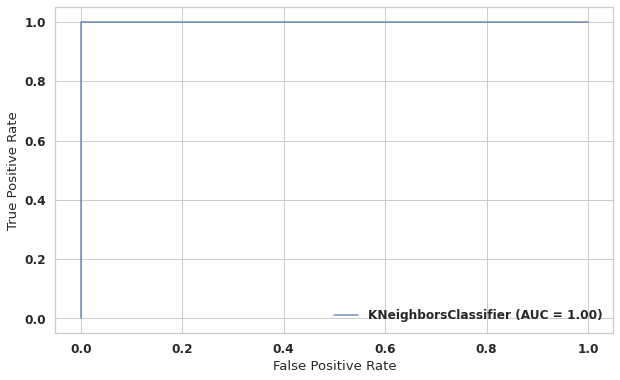

In [ ]:
disp = plot_roc_curve(knn, Xtest,Ytest, alpha=0.8)
plt.show()

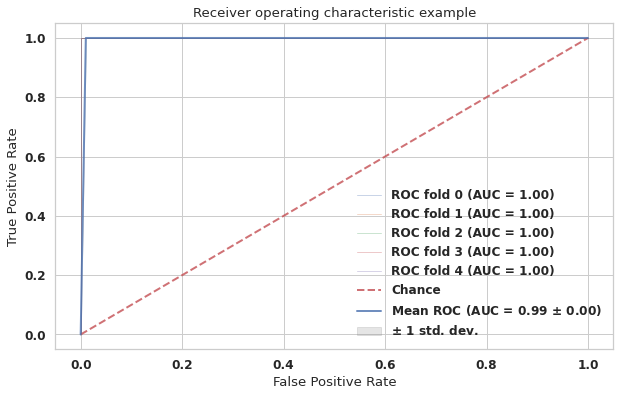

List of all accuracies obtained: [99.8888888888889, 99.66666666666667, 99.55555555555556, 99.8888888888889, 99.77777777777777]

Maximum Accuracy that can be obtained from this model is: 99.8888888888889 %

Minimum Accuracy that can be obtained from this model is: 99.55555555555556 %

Overall Accuracy: 99.75555555555556 %

Standard Deviation is: 0.14487116456006244


In [ ]:
# perform cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    knn.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(knn.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(knn, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

[[311  12]
 [  0 577]]


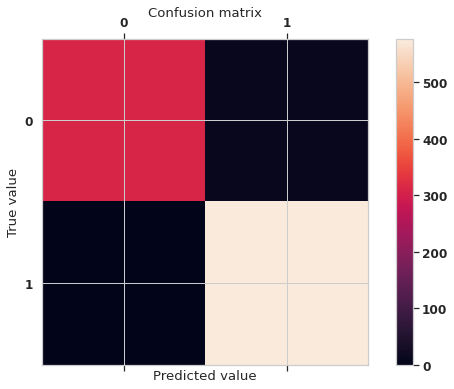

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       1.00      0.96      0.98       323
 Non-glasses       0.98      1.00      0.99       577

    accuracy                           0.99       900
   macro avg       0.99      0.98      0.99       900
weighted avg       0.99      0.99      0.99       900



With PCA

In [ ]:

knn.fit(xtr_pca,ytr_pca)
ypred = knn.predict(xt_pca)

from sklearn.metrics import accuracy_score
print("KNN With PCA")
accuracy_score(yt_pca,ypred)

KNN With PCA


1.0

With LDA

In [ ]:
knn.fit(xtr_lda,ytr_lda)
ypred = knn.predict(xt_lda)

from sklearn.metrics import accuracy_score
print("KNN With LDA")
accuracy_score(yt_lda,ypred)

KNN With LDA


1.0

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
y_pred =  gnb.predict(Xtest)
print("Accuracy of Gaussian Naive Bayes: ", accuracy_score(Ytest,gnb.predict(Xtest)))
accuracies.append(accuracy_score(Ytest,y_pred))

Accuracy of Gaussian Naive Bayes:  0.9833333333333333


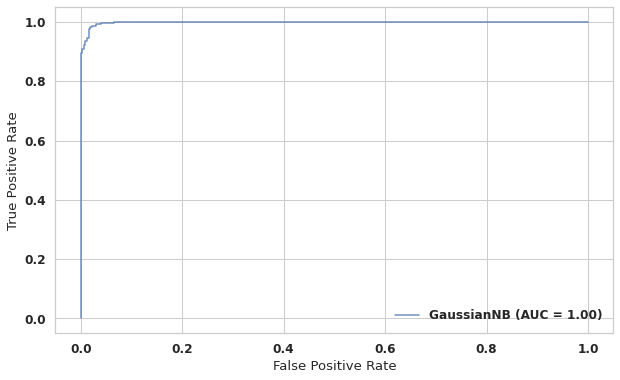

In [ ]:
disp2 = plot_roc_curve(gnb, Xtest,Ytest, alpha=0.8)
plt.show()

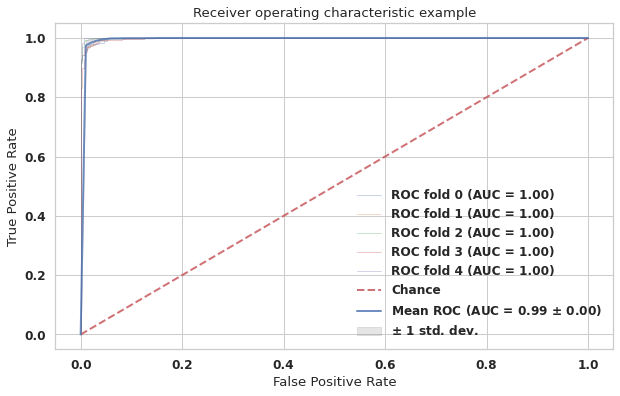

List of all accuracies obtained: [97.66666666666667, 98.55555555555556, 99.0, 97.66666666666667, 99.44444444444444]

Maximum Accuracy that can be obtained from this model is: 99.44444444444444 %

Minimum Accuracy that can be obtained from this model is: 97.66666666666667 %

Overall Accuracy: 98.46666666666667 %

Standard Deviation is: 0.7950463919999224


In [ ]:
# perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    gnb.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(gnb.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(gnb, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

[[310  13]
 [  2 575]]


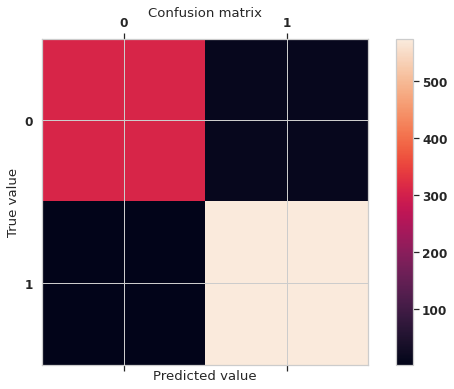

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       0.99      0.96      0.98       323
 Non-glasses       0.98      1.00      0.99       577

    accuracy                           0.98       900
   macro avg       0.99      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



With PCA

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_pca = RandomForestClassifier(max_depth=2, random_state=42)

# xtr,xt,ytr,yt= train_test_split(X_pca,df['glasses'], test_size=0.2, random_state=42)
gnb.fit(xtr_pca,ytr_pca)
ypred = gnb.predict(xt_pca)

from sklearn.metrics import accuracy_score
print("Gaussian With PCA")
accuracy_score(yt_pca,ypred)

Gaussian With PCA


1.0

With LDA

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_lda = RandomForestClassifier(max_depth=2, random_state=42)

# xtr_lda,xt_lda,ytr_lda,yt_lda= train_test_split(X_lda_sklearn,df['glasses'], test_size=0.2, random_state=42)
gnb.fit(xtr_lda,ytr_lda)
ypred = gnb.predict(xt_lda)

from sklearn.metrics import accuracy_score
print("Gaussian With LDA")
accuracy_score(yt_lda,ypred)

Gaussian With LDA


1.0

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
lr=LogisticRegression()
lr.fit(Xtrain, Ytrain)
y_pred = lr.predict(Xtest)
# accuracies.append(x.score(X_test, Y_test))
# f1.append(f1_score(Y_test, x.predict(X_test)))
print('Accuracy of logistic regression classifier: ',accuracy_score(Ytest,lr.predict(Xtest)))
accuracies.append(accuracy_score(Ytest,y_pred))
# print('f1 score of logistic regression classifier: ',f1_score(Y_test, x.predict(X_test)))

Accuracy of logistic regression classifier:  0.9944444444444445


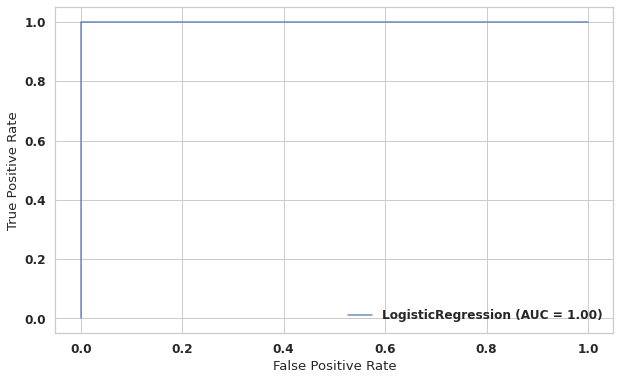

In [ ]:
disp3 = plot_roc_curve(lr, Xtest,Ytest, alpha=0.8)
plt.show()

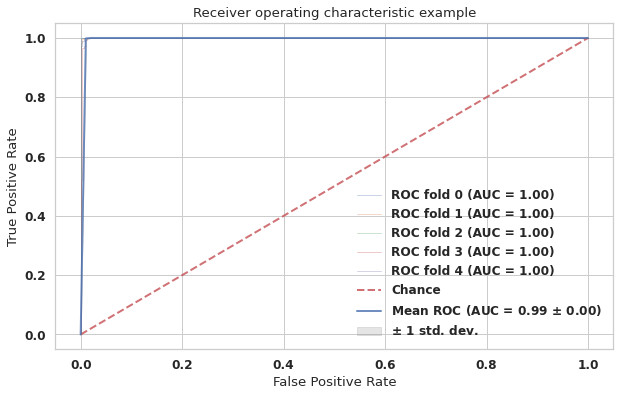

List of all accuracies obtained: [99.22222222222223, 99.22222222222223, 99.66666666666667, 99.22222222222223, 99.44444444444444]

Maximum Accuracy that can be obtained from this model is: 99.66666666666667 %

Minimum Accuracy that can be obtained from this model is: 99.22222222222223 %

Overall Accuracy: 99.35555555555555 %

Standard Deviation is: 0.1987615979999798


In [ ]:
# perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    lr.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(lr.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(lr, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

[[318   5]
 [  0 577]]


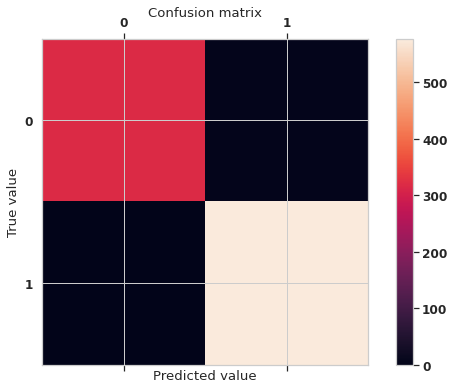

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       1.00      0.98      0.99       323
 Non-glasses       0.99      1.00      1.00       577

    accuracy                           0.99       900
   macro avg       1.00      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



With PCA

In [ ]:
lr.fit(xtr_pca,ytr_pca)
ypred = lr.predict(xt_pca)

from sklearn.metrics import accuracy_score
print("Logistic Regression With PCA")
accuracy_score(yt_pca,ypred)

Logistic Regression With PCA


0.9911111111111112

With LDA

In [ ]:
lr.fit(xtr_lda,ytr_lda)
ypred = lr.predict(xt_lda)

from sklearn.metrics import accuracy_score
print("Logistic Regression With LDA")
accuracy_score(yt_lda,ypred)

Logistic Regression With LDA


1.0

RFE feature selection

In [ ]:
from sklearn.feature_selection import RFE
# deep_tree = RandomForestClassifier(max_depth=12, random_state=42)
rfe = RFE(LogisticRegression(), n_features_to_select=5, step=1)
# rfe = RFE(deep_tree, 280)
rfe = rfe.fit(Xtrain, Ytrain)
print(rfe.support_)
print(rfe.ranking_)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [ ]:

names = list(i for i in list(df))
print(names)
print([names[i] for i in range(len(rfe.support_)) if rfe.support_[i]])


['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138

In [ ]:

Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(df[[names[i] for i in range(len(rfe.support_)) if rfe.support_[i]]], Y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Xrfe_train, yrfe_train)
pred = clf.predict(Xrfe_test)
accuracy_score(yrfe_test, pred)

0.6444444444444445

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=30, kernel='rbf', probability=True)
svc.fit(Xtrain, Ytrain)
y_pred=svc.predict(Xtest)
print('Accuracy of SVM classifier: ',accuracy_score(Ytest,svc.predict(Xtest)))
accuracies.append(accuracy_score(Ytest,y_pred))

Accuracy of SVM classifier:  1.0


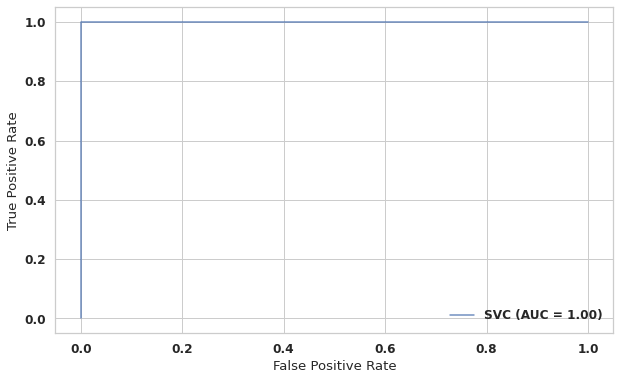

In [ ]:
disp4 = plot_roc_curve(svc, Xtest,Ytest, alpha=0.8)
plt.show()

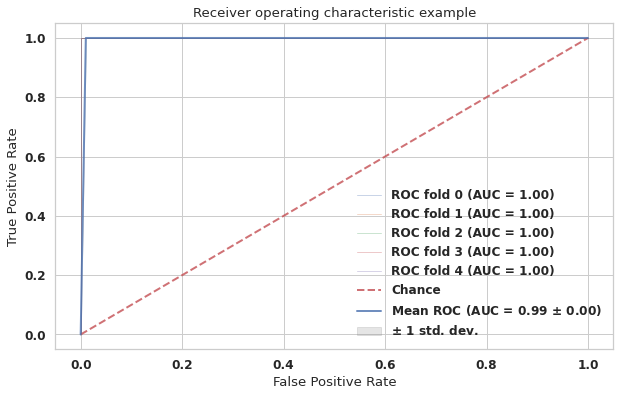

List of all accuracies obtained: [100.0, 100.0, 100.0, 100.0, 100.0]

Maximum Accuracy that can be obtained from this model is: 100.0 %

Minimum Accuracy that can be obtained from this model is: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [ ]:
# perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    svc.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(svc.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(svc, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

[[323   0]
 [  0 577]]


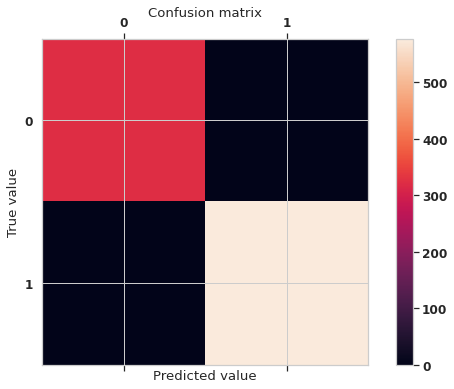

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       1.00      1.00      1.00       323
 Non-glasses       1.00      1.00      1.00       577

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [ ]:
svc.fit(xtr_pca,ytr_pca)
ypred = svc.predict(xt_pca)

from sklearn.metrics import accuracy_score
print("SVM With PCA")
accuracy_score(yt_pca,ypred)

SVM With PCA


1.0

In [ ]:
svc.fit(xtr_lda,ytr_lda)
ypred = svc.predict(xt_lda)

from sklearn.metrics import accuracy_score
print("SVM With LDA")
accuracy_score(yt_lda,ypred)

SVM With LDA


0.9988888888888889

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
# xtr,xt,ytr,yt= train_test_split(X_std,df['glasses'], test_size=0.2, random_state=42)
mlp.fit(Xtrain, Ytrain)
y_pred= mlp.predict(Xtest)
print('Accuracy of MLP classifier: ',accuracy_score(Ytest,mlp.predict(Xtest)))
accuracies.append(accuracy_score(Ytest,y_pred))


# from sklearn.svm import SVC
# svc = SVC(C=30, kernel='rbf', probability=True)
# svc.fit(Xtrain, Ytrain)
# y_pred=svc.predict(Xtest)

Accuracy of MLP classifier:  0.9866666666666667


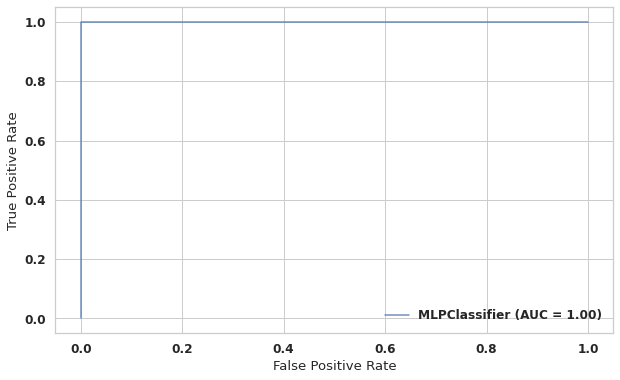

In [ ]:
disp5 = plot_roc_curve(mlp, Xtest,Ytest, alpha=0.8)
plt.show()

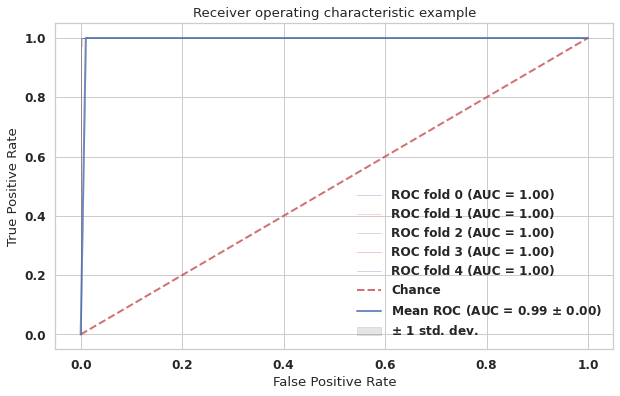

List of all accuracies obtained: [99.11111111111111, 99.11111111111111, 99.44444444444444, 98.88888888888889, 99.22222222222223]

Maximum Accuracy that can be obtained from this model is: 99.44444444444444 %

Minimum Accuracy that can be obtained from this model is: 98.88888888888889 %

Overall Accuracy: 99.15555555555555 %

Standard Deviation is: 0.20184335693983343


In [ ]:
# perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    mlp.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(mlp.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(mlp, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 

[[311  12]
 [  0 577]]


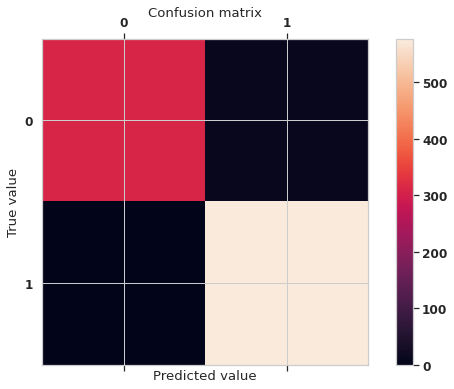

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
print(cm)
labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels) 
ax.set_yticklabels([''] + labels) 
plt.xlabel('Predicted value') 
plt.ylabel('True value') 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names=['Glasses','Non-glasses']
print(classification_report(Ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Glasses       1.00      0.96      0.98       323
 Non-glasses       0.98      1.00      0.99       577

    accuracy                           0.99       900
   macro avg       0.99      0.98      0.99       900
weighted avg       0.99      0.99      0.99       900



In [ ]:
mlp.fit(xtr_pca,ytr_pca)
ypred = mlp.predict(xt_pca)

from sklearn.metrics import accuracy_score
print("MLP With PCA")
accuracy_score(yt_pca,ypred)

MLP With PCA


0.9977777777777778

In [ ]:
mlp.fit(xtr_lda,ytr_lda)
ypred = mlp.predict(xt_lda)

from sklearn.metrics import accuracy_score
print("MLP With LDA")
accuracy_score(yt_lda,ypred)

MLP With LDA


1.0

# **Box-plot Comparision**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
models = {'rf':deep_tree,'lr':lr,'gnb':gnb,'mlp':mlp,'svc':svc,'knn':knn}
results=[]
names=[]

for name, model in models.items():
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_std, df['glasses'], scoring='accuracy', cv=cv, n_jobs=-1)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
  print(scores)
print(names)
print(scores)


>rf 0.938 (0.012)
[0.95333333 0.91888889 0.93666667 0.94222222 0.93111111 0.94777778
 0.93222222 0.92       0.92777778 0.94111111 0.93       0.96333333
 0.95111111 0.94555556 0.93333333]
>lr 0.994 (0.002)
[0.99444444 0.99       0.99777778 0.99333333 0.99444444 0.99222222
 0.99444444 0.99333333 0.99222222 0.99777778 0.99555556 0.99444444
 0.99444444 0.99333333 0.99      ]
>gnb 0.985 (0.003)
[0.98555556 0.98111111 0.99       0.98333333 0.98666667 0.98
 0.98888889 0.98444444 0.98444444 0.98       0.98888889 0.98444444
 0.98333333 0.98222222 0.98777778]
>mlp 0.998 (0.001)
[0.99777778 0.99888889 0.99777778 0.99777778 0.99777778 0.99555556
 0.99777778 0.99888889 0.99888889 0.99666667 0.99888889 0.99888889
 1.         0.99555556 0.99888889]
>svc 1.000 (0.000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
>knn 0.998 (0.001)
[0.99555556 1.         0.99444444 0.99777778 0.99888889 0.99777778
 0.99666667 0.99777778 0.99666667 0.99888889 0.99777778 0.99777778
 0.99888889 0.99777778 0.99777778]
['

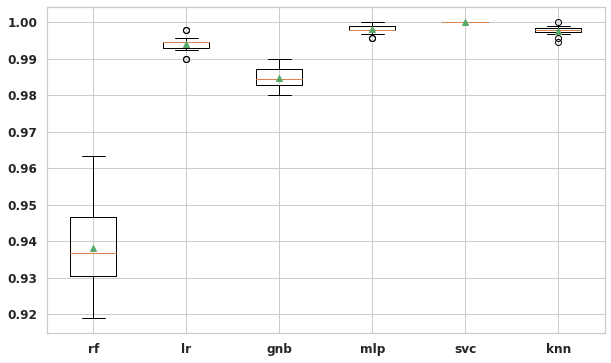

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
fitmodel = [deep_tree,lr,gnb,mlp,svc,knn]
Models = ['Random Forest','Logistic Regression','Gaussian Naive Bayes','MLP','SVM','KNN']

[0.9333333333333333, 0.9955555555555555, 0.9833333333333333, 0.9944444444444445, 1.0, 0.9866666666666667]


Text(0.5, 1.0, 'Comparison of accuracies of different models')

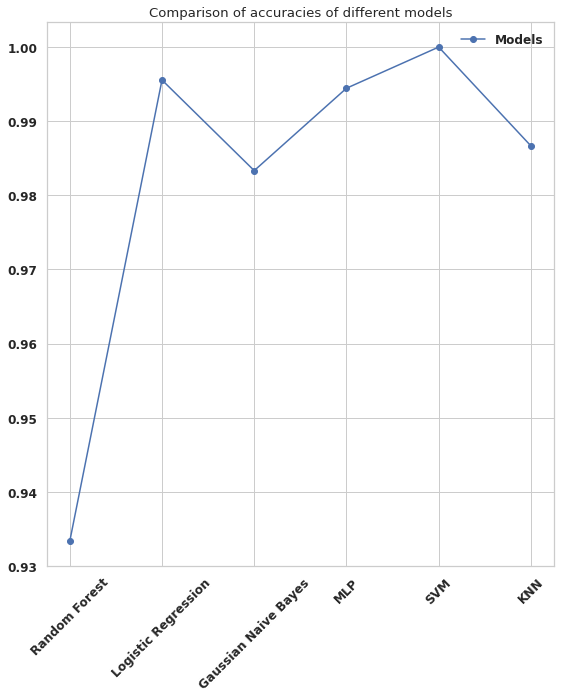

In [ ]:
plt.figure(figsize = (20,10))
ax = plt.subplot(121)
print(accuracies)
plt.plot(Models,accuracies,marker='o')
plt.xticks(rotation=45)
plt.legend(labels = ['Models','Accuracy'])
plt.title('Comparison of accuracies of different models')

In [ ]:
sub = pd.DataFrame()
sub['id'] = test['id']
sub['glasses'] = p

In [ ]:
sub.rename_axis(None, inplace=True)
sub

,id,glasses
0,4501,1
1,4502,1
2,4503,1
3,4504,1
4,4505,1
...,...,...
495,4996,1
496,4997,1
497,4998,1
498,4999,0


In [ ]:
sub.to_csv('/content/drive/My Drive/sample.csv')